# Classification

#### Imports

In [84]:
#dataframe
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#standardscaler
from sklearn.preprocessing import StandardScaler

#clustering
from kneed import KneeLocator
import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [85]:
df = pd.read_csv('final_dataset.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [86]:
df.head(3)

,punk_id,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff
0,0,6,3,2118,3,25.0,3.0,27.58,40,25.0,23.4,1137.0
1,1,4,4,4337,2,60.0,3.0,91.42,63,60.0,29.0,406.0
2,2,5,3,7995,1,0.0,0.0,0.00,30,0.0,0.0,1662.0


In [87]:
df1 = df.copy()
df1.drop(['punk_id'], axis=1, inplace=True)
df2 = df['punk_id'].to_frame()

In [88]:
df1.head()

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff
0,6,3,2118,3,25.0,3.0,27.58,40,25.0,23.4,1137.0
1,4,4,4337,2,60.0,3.0,91.42,63,60.0,29.0,406.0
2,5,3,7995,1,0.0,0.0,0.00,30,0.0,0.0,1662.0
3,4,4,7834,3,0.0,0.0,0.00,17,0.0,0.0,1662.0
4,6,4,7189,4,0.0,0.0,0.00,12,0.0,0.0,1662.0


In [89]:
df2 = df['punk_id'].to_frame()
df2.head()

,punk_id
0,0
1,1
2,2
3,3
4,4


In [90]:
scaler = StandardScaler()
df_mod = scaler.fit_transform(df1)
df_scaled = pd.DataFrame(df_mod, index=df1.index, columns=df1.columns)
df_scaled.head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff
0,1.201769,-1.239552,-1.051780,0.298610,0.164987,0.514951,-0.176212,1.419879,0.138521,0.965145,0.314557
1,-0.828153,0.806743,-0.273365,-0.945281,1.296198,0.514951,0.718992,2.783666,1.249570,1.278277,-0.747998
2,0.186808,-1.239552,1.009846,-2.189171,-0.643021,-0.791460,-0.562955,0.826928,-0.655086,-0.343299,1.077679


In [91]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
df_final = pd.DataFrame(data = pca_data, columns = ['component1', 'component2'])
df_final.head()

,component1,component2
0,0.817769,1.697738
1,3.166116,-0.344889
2,-1.349117,-0.425393
3,-1.483079,-1.118961
4,-1.566972,-0.515306


In [94]:
#how many clusters? elbow method
sse = []
for k in range(2, 10):
    model = KMeans(n_clusters=k, max_iter= 300, random_state= 42)
    model.fit(df_final)
    sse.append(model.inertia_)
kl = KneeLocator(range(2, 10), sse, curve="convex", direction="decreasing")
print('Ideal cluster number is:', kl.elbow)

Ideal cluster number is: 4


In [40]:
sse

[23184.111429256594,
 15581.748264194068,
 10989.13108119326,
 8649.567319260685,
 7071.403933896872,
 6042.682819732998,
 5198.093911891073,
 4632.5181679882735,
 4147.291890876271,
 3784.5928075619395,
 3444.637084421663,
 3164.0732252462312,
 2924.759162217807]

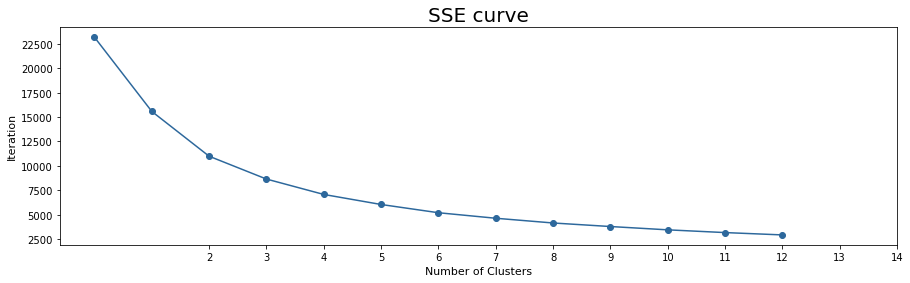

In [41]:
plt.figure(figsize=(15, 4)) 
plt.plot(sse, marker= "o",color='#2D689C')
plt.xticks(range(2, 15))
plt.title("SSE curve", fontsize = 20)
plt.xlabel("Number of Clusters",fontsize = 11)
plt.ylabel("Iteration",fontsize = 11)
plt.savefig('31.png')
plt.show()

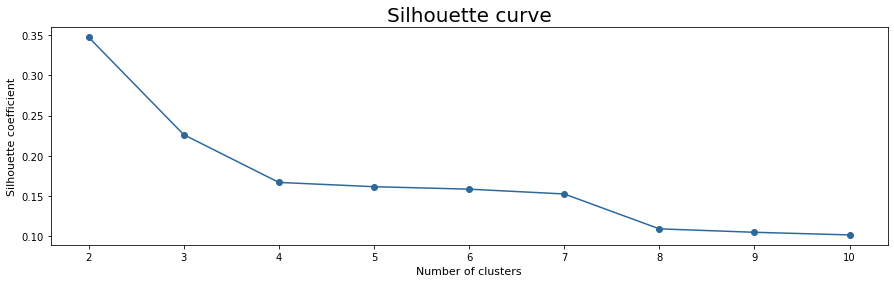

In [20]:
#silhouette curve
silhouette_coefficients = []
for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_final)
    score1 = silhouette_score(df_scaled, model.labels_)
    silhouette_coefficients.append(score1)
    
plt.figure(figsize =(15, 4))
plt.plot(range(2, 11), silhouette_coefficients, marker= "o",color='#2D689C')
plt.xticks(range(2, 11))
plt.title("Silhouette curve", fontsize = 20)
plt.xlabel("Number of clusters",fontsize = 11)
plt.ylabel("Silhouette coefficient",fontsize = 11)
plt.savefig('32.png')
plt.show()

In [57]:
model = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
model.fit(df_final)

KMeans(init='random', n_clusters=4, random_state=42)

In [58]:
y_kmeans = model.predict(df_final)
df_final['cluster'] = y_kmeans
df_final.head()

,component1,component2,cluster
0,0.817769,1.697738,1
1,3.166116,-0.344889,0
2,-1.349117,-0.425393,2
3,-1.483079,-1.118961,2
4,-1.566972,-0.515306,2


In [59]:
df_final['cluster'].unique()

array([1, 0, 2, 3], dtype=int32)

In [60]:
# save for future analysis
df_final.to_csv('df_final_4clusters.csv')

In [61]:
#score
labels = model.labels_
silhouette1 = metrics.silhouette_score(df_final, labels, metric = 'euclidean')
print('Silhouette score is:',round(silhouette1,2))

Silhouette score is: 0.51


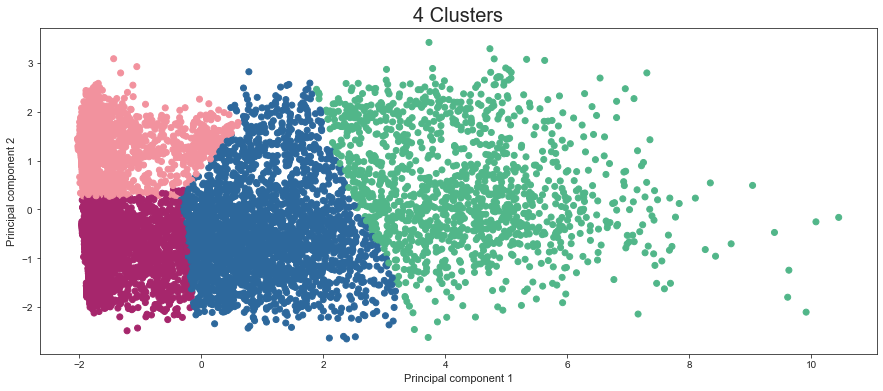

In [62]:
plt.figure(figsize=(15, 6))
fte_colors = {0: "#51B689",1: "#2D689C",2: "#A6266C", 3: "#F2929E"}
km_colors = [fte_colors[label] for label in model.labels_]

plt.scatter(df_final['component1'], df_final['component2'], c=km_colors)
plt.title("4 Clusters", fontsize = 20)
plt.xlabel("Principal component 1",fontsize = 11)
plt.ylabel("Principal component 2",fontsize = 11)
plt.savefig('33.png')
plt.show()

In [95]:
model = KMeans(init="random",n_clusters=8,n_init=10,max_iter=300,random_state=42)
model.fit(df_final)

KMeans(init='random', random_state=42)

In [96]:
y_kmeans = model.predict(df_final)
df_final['cluster'] = y_kmeans
df_final.head()

,component1,component2,cluster
0,0.817769,1.697738,1
1,3.166116,-0.344889,4
2,-1.349117,-0.425393,6
3,-1.483079,-1.118961,2
4,-1.566972,-0.515306,6


In [65]:
# save for future analysis
df_final.to_csv('df_final_8clusters.csv')

In [100]:
df_final = pd.read_csv('df_final_8clusters.csv')
df_final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [101]:
df_final['cluster'].unique()

array([1, 7, 6, 4, 5, 0, 2, 3])

In [102]:
#score
labels = model.labels_
kmeans_silhouette = metrics.silhouette_score(df_final, labels, metric = 'euclidean')
print('Silhouette score is:',round(kmeans_silhouette,2))

Silhouette score is: 0.44


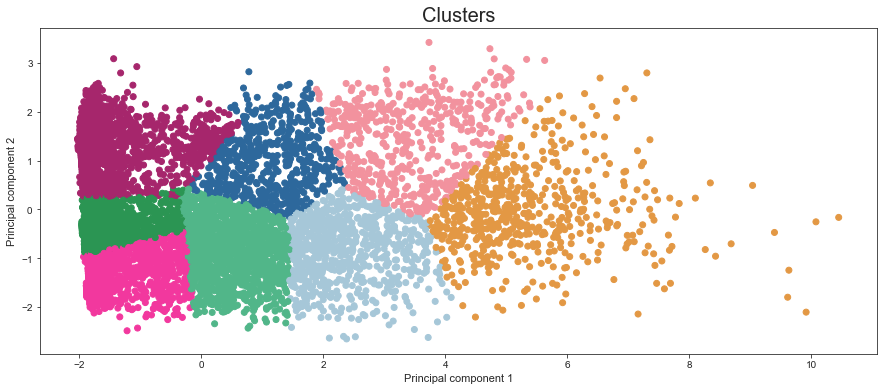

In [69]:
plt.figure(figsize=(15, 6))
fte_colors = {0: "#51B689",1: "#2D689C",2: "#E39844", 3: "#F2929E",
              4: "#F2389E",5: "#A6266C",6: "#2B9553",7: "#A6C7D8"}
km_colors = [fte_colors[label] for label in model.labels_]

plt.scatter(df_final['component1'], df_final['component2'], c=km_colors)

plt.title("Clusters", fontsize = 20)
plt.xlabel("Principal component 1",fontsize = 11)
plt.ylabel("Principal component 2",fontsize = 11)
plt.savefig('34.png')
plt.show()

In [103]:
conditions = [(df_final['cluster'] == 0),
              (df_final['cluster'] == 1),
              (df_final['cluster'] == 2),
              (df_final['cluster'] == 3),
              (df_final['cluster'] == 4),
              (df_final['cluster'] == 5),
              (df_final['cluster'] == 6),
              (df_final['cluster'] == 7)]

values = [1, 2, 3, 4, 5, 6, 7, 8]
df_final['cluster'] = np.select(conditions, values)

In [108]:
df_final['cluster'].value_counts()

6    2105
7    1949
1    1384
5    1229
8     745
3     592
2     584
4     518
Name: cluster, dtype: int64

In [109]:
df_final.head()

,component1,component2,cluster
0,0.817769,1.697738,2
1,3.166116,-0.344889,8
2,-1.349117,-0.425393,7
3,-1.483079,-1.118961,5
4,-1.566972,-0.515306,7


In [110]:
df1['cluster'] = df_final['cluster']
df1['punk_id'] = df2['punk_id']
df1.head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster,punk_id
0,6,3,2118,3,25.0,3.0,27.58,40,25.0,23.4,1137.0,2,0
1,4,4,4337,2,60.0,3.0,91.42,63,60.0,29.0,406.0,8,1
2,5,3,7995,1,0.0,0.0,0.00,30,0.0,0.0,1662.0,7,2


In [45]:
#check correct asignation
df1[5785:5790]

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster,punk_id
5785,5,3,8324,2,0.50,1.0,0.50,9,0.50,0.00,941.0,7,6324
5786,5,4,8870,3,44.00,2.0,86.00,20,44.00,2.00,143.0,8,6325
5787,3,3,2626,2,42.99,3.0,58.99,34,42.99,32.99,301.0,2,6326
5788,4,4,7438,3,0.00,0.0,0.00,4,0.00,0.00,1662.0,5,6327
5789,6,4,2981,2,0.00,0.0,0.00,4,0.00,0.00,1662.0,7,6328


In [46]:
df1.groupby(['cluster']).mean()

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,punk_id
cluster,,,,,,,,,,,,
1,4.820087,3.822977,6643.200867,2.740607,18.709863,2.764451,32.528158,19.405347,20.301257,3.248663,289.752168,5269.562861
2,4.965753,3.279110,2893.551370,2.946918,33.785805,2.604452,56.523339,24.453767,34.938630,7.515360,261.921233,5427.000000
3,4.677365,3.768581,5994.981419,2.748311,93.781334,5.869932,224.960253,45.550676,96.020473,40.231470,108.555743,5459.032095
4,4.996139,3.270270,2998.608108,3.057915,77.958494,3.202703,142.950193,31.513514,79.340792,26.309112,153.762548,5537.698842
5,4.682669,3.963385,7766.959317,2.387307,1.031774,0.746949,1.414874,7.235964,1.220130,0.003751,1268.908055,4188.192840
6,4.854632,3.176722,2335.723515,2.913539,1.984822,0.441805,2.427083,7.942043,2.113644,0.044342,1441.899287,4981.085986
7,4.832222,3.719856,5730.340688,2.743458,0.355762,0.347871,0.406296,5.895331,0.359887,0.048574,1516.177527,4784.673679
8,4.743624,3.885906,6673.428188,2.675168,44.966832,4.755705,97.555289,33.099329,46.739195,12.595235,181.660403,5160.311409


In [47]:
#display all rows
pd.options.display.max_rows = 200

In [48]:
df1.groupby(['cluster','type_id','skin_id'])['type_id'].count()

cluster  type_id  skin_id
1        3        3           26
                  4           85
                  5           70
                  6           64
         4        3          105
                  4          320
                  5          360
                  6          354
2        3        3           32
                  4          129
                  5          123
                  6          137
         4        3            6
                  4           28
                  5           53
                  6           76
3        3        3           17
                  4           49
                  5           32
                  6           39
         4        3           51
                  4          167
                  5          115
                  6          122
4        3        3           27
                  4           90
                  5          123
                  6          138
         4        3            7
                 

In [49]:
df1.groupby(['cluster','total_att'])['total_att'].count()

cluster  total_att
1        0              1
         1             15
         2            520
         3            661
         4            180
         5              7
2        0              1
         1              4
         2            172
         3            270
         4            124
         5             11
         6              2
3        1              5
         2            233
         3            269
         4             76
         5              9
4        1              4
         2            123
         3            258
         4            108
         5             23
         6              1
         7              1
5        1             86
         2            639
         3            448
         4             54
         5              2
6        0              3
         1             69
         2            622
         3            907
         4            427
         5             71
         6              6
7        0         

In [50]:
df1['last_prices_diff'].min()

-114.8

In [51]:
df['last_prices_diff'].mean()

6.139505820338232

In [52]:
df_a = df1 [df1['last_prices_diff'] < 0]
len(df_a)

442

In [53]:
df_b= df1[df1['last_prices_diff'] == 0]
len(df_b)

5405

In [54]:
df_c = df1[df1['last_prices_diff'] > 0]
len(df_c)

3259

In [55]:
df_c['cluster'].value_counts()

1    859
8    599
3    528
4    409
2    399
5    196
6    162
7    107
Name: cluster, dtype: int64

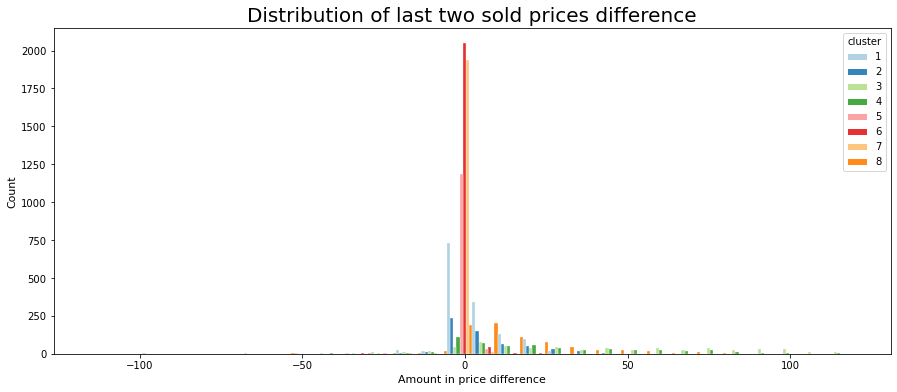

In [57]:
fig = plt.figure(figsize = (15,6))
sns.histplot(x='last_prices_diff', data=df1, kde=False , edgecolor="w", alpha=.9, hue='cluster',
             bins=30, palette="Paired", multiple='dodge')
plt.title("Distribution of last two sold prices difference",fontsize=20)
plt.xlabel("Amount in price difference",fontsize=11)
plt.ylabel("Count",fontsize=11)
plt.savefig('42.png')
plt.show()

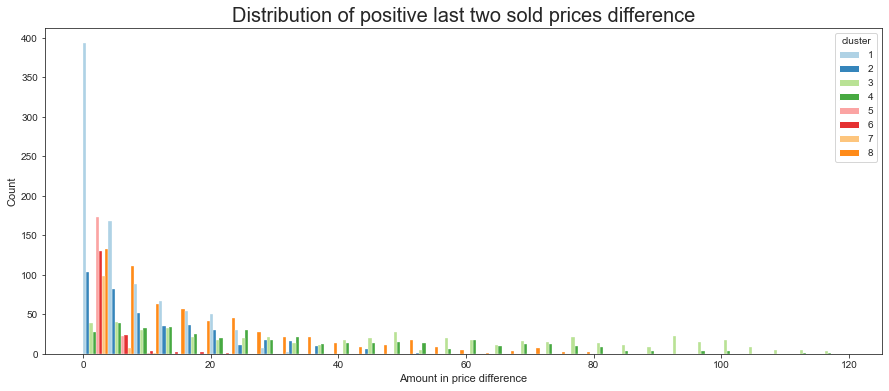

In [115]:
fig = plt.figure(figsize = (15,6))
labels = ['1','2','3','4','5','6','7']
sns.histplot(x='last_prices_diff', data=df_c, kde=False , edgecolor="w", alpha=.9, hue = 'cluster',
             bins=30, palette="Paired", multiple='dodge')
plt.title("Distribution of positive last two sold prices difference",fontsize=20)
plt.xlabel("Amount in price difference",fontsize=11)
plt.ylabel("Count",fontsize=11)
plt.savefig('43.png')
plt.show()

In [135]:
data = df1.groupby(['cluster']).sum()
data['cluster'] = data.index

In [136]:
data

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster
cluster,,,,,,,,,,,,
1,6671,5291,9194190,3793,25894.45,3826.0,45018.97,26857,28096.94,4496.15,401017.0,1
2,2900,1915,1689834,1721,19730.91,1521.0,33009.63,14281,20404.16,4388.97,152962.0,2
3,2769,2231,3549029,1627,55518.55,3475.0,133176.47,26966,56844.12,23817.03,64265.0,3
4,2588,1694,1553279,1584,40382.50,1659.0,74048.20,16324,41098.53,13628.12,79649.0,4
5,5755,4871,9545593,2934,1268.05,918.0,1738.88,8893,1499.54,4.61,1559488.0,5
6,10219,6687,4916698,6133,4178.05,930.0,5109.01,16718,4449.22,93.34,3035198.0,6
7,9418,7250,11168434,5347,693.38,678.0,791.87,11490,701.42,94.67,2955030.0,7
8,3534,2895,4971704,1993,33500.29,3543.0,72678.69,24659,34820.70,9383.45,135337.0,8


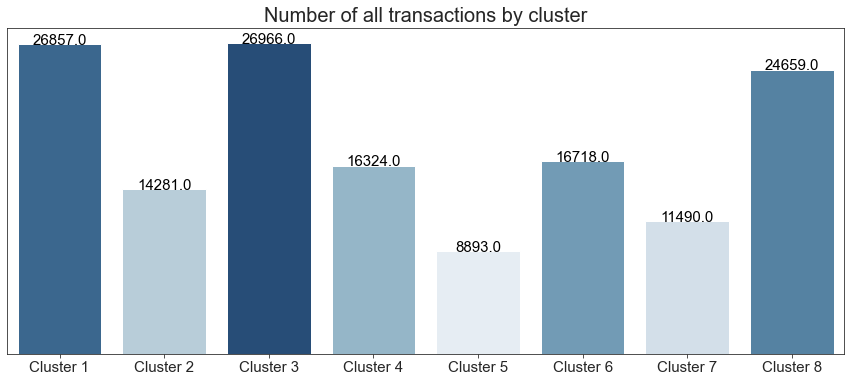

In [155]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x=data.index, y="num_trans", data=data, palette=(["#2D689C",
                                                                  "#B3CEDE",
                                                                  "#1A4D84",
                                                                  "#8DB8D0",
                                                                  "#E4EDF5",
                                                                  "#679EC0",
                                                                  "#D0DFEC",
                                                                  "#4884AF"]))

a.set_xticklabels(['Cluster 1','Cluster 2','Cluster 3','Cluster 4',
                   'Cluster 5','Cluster 6','Cluster 7','Cluster 8'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.cluster-1, row.num_trans, row.num_trans, color='black', ha="center",fontsize=15)
    
plt.title("Number of all transactions by cluster",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('44.png')
plt.show(a)

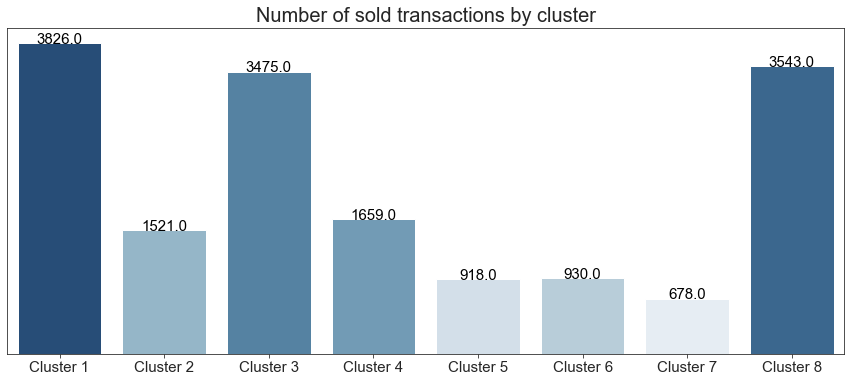

In [154]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x=data.index, y="num_sold_trans", data=data, palette=(["#1A4D84",
                                                                  "#8DB8D0",
                                                                  "#4884AF",
                                                                  "#679EC0",
                                                                  "#D0DFEC",
                                                                  "#B3CEDE",
                                                                  "#E4EDF5",
                                                                  "#2D689C"]))

a.set_xticklabels(['Cluster 1','Cluster 2','Cluster 3','Cluster 4',
                   'Cluster 5','Cluster 6','Cluster 7','Cluster 8'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.cluster-1, row.num_sold_trans, row.num_sold_trans, color='black', ha="center",fontsize=15)
    
plt.title("Number of sold transactions by cluster",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('45.png')
plt.show(a)

### Get best characters

In [137]:
df_best = df1[df1['cluster'] == 3]
df_best = df_best[df_best['type_id'] == 4]

In [138]:
df_albino = df_best[df_best['skin_id'] == 3]#albino
df_dark = df_best[df_best['skin_id'] == 4]#dark
df_light = df_best[df_best['skin_id'] == 5]#light
df_mid = df_best[df_best['skin_id'] == 6]#mid

In [150]:
df_albino.sort_values(by='last_prices_diff', ascending=False).head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster,punk_id
1148,3,4,7110,2,109.00,4.0,125.50,35,109.00,103.00,73.0,3,1241
3029,3,4,822,2,105.00,5.0,110.35,53,105.00,101.50,158.0,3,3317
5819,3,4,5743,2,103.03,4.0,121.02,38,103.03,86.17,73.0,3,6363


In [151]:
df_dark.sort_values(by='last_prices_diff', ascending=False).head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster,punk_id
4598,4,4,4793,4,118.49,2.0,118.57,14,118.49,118.41,132.0,3,5023
4535,4,4,3289,4,115.00,2.0,115.15,43,115.00,114.85,144.0,3,4953
2221,4,4,3740,2,114.44,2.0,114.94,27,114.44,113.94,130.0,3,2416


In [152]:
df_light.sort_values(by='last_prices_diff', ascending=False).head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster,punk_id
2490,5,4,6056,4,115.95,5.0,125.08,20,115.95,115.95,88.0,3,2728
7595,5,4,5956,3,114.99,6.0,157.26,26,114.99,114.99,102.0,3,8322
4452,5,4,6748,2,118.90,10.0,145.08,35,118.90,113.45,108.0,3,4861


In [153]:
df_mid.sort_values(by='last_prices_diff', ascending=False).head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster,punk_id
8213,6,4,2645,2,116.0,4.0,124.39,102,116.0,108.00,76.0,3,9005
4102,6,4,9084,3,104.0,2.0,104.13,6,104.0,103.87,65.0,3,4482
5492,6,4,6955,3,102.0,4.0,104.40,22,102.0,100.65,136.0,3,6007


In [154]:
df_best = df1[df1['cluster'] == 3]
df_best = df_best[df_best['type_id'] == 3]

In [155]:
df_albino = df_best[df_best['skin_id'] == 3]#albino
df_dark = df_best[df_best['skin_id'] == 4]#dark
df_light = df_best[df_best['skin_id'] == 5]#light
df_mid = df_best[df_best['skin_id'] == 6]#mid

In [156]:
df_albino.sort_values(by='last_prices_diff', ascending=False).head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster,punk_id
6066,3,3,9585,3,111.00,2.0,128.00,30,111.00,94.00,126.0,3,6637
5658,3,3,1634,2,99.00,5.0,170.00,78,99.00,77.00,116.0,3,6187
3444,3,3,9715,2,80.99,6.0,103.51,42,80.99,75.99,60.0,3,3768


In [157]:
df_dark.sort_values(by='last_prices_diff', ascending=False).head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster,punk_id
5601,4,3,8268,4,118.5,9.0,152.89,46,118.5,118.50,135.0,3,6125
4646,4,3,8057,4,115.0,2.0,124.50,13,115.0,105.50,136.0,3,5074
2657,4,3,8278,4,115.0,3.0,133.88,15,115.0,105.11,135.0,3,2915


In [158]:
df_light.sort_values(by='last_prices_diff', ascending=False).head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster,punk_id
3355,5,3,8111,3,100.00,3.0,100.31,24,100.00,99.82,153.0,3,3675
5144,5,3,8277,4,118.69,2.0,138.39,11,118.69,98.99,107.0,3,5628
3121,5,3,8952,2,95.00,6.0,185.24,43,95.00,95.00,135.0,3,3420


In [159]:
df_mid.sort_values(by='last_prices_diff', ascending=False).head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster,punk_id
6662,6,3,5632,3,119.0,4.0,123.40,23,119.0,116.55,108.0,3,7305
4664,6,3,8464,3,115.0,2.0,115.35,6,115.0,114.65,102.0,3,5094
7673,6,3,8635,3,111.0,2.0,111.10,17,111.0,110.90,116.0,3,8406
